# 宿題２

In [1]:
# このセルまでは先週の課題と同じ
import numpy as np
import matplotlib

#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

np.random.seed(0)  # set the random seed for reproducibility


def generate_sample(xmin, xmax, sample_size):
    x = np.linspace(start=xmin, stop=xmax, num=sample_size)
    pix = np.pi * x
    target = np.sin(pix) / pix + 0.1 * x
    noise = 0.05 * np.random.normal(loc=0., scale=1., size=sample_size)
    return x, target + noise


def calc_design_matrix(x, c, h):
    return np.exp(-(x[None] - c[:, None]) ** 2 / (2 * h ** 2))


# create sample
sample_size = 50
xmin, xmax = -3, 3
x, y = generate_sample(xmin=xmin, xmax=xmax, sample_size=sample_size)

# calculate design matrix
h = 0.2
#  l1正則化パラメータ
l = 0.1
k = calc_design_matrix(x, x, h)

In [2]:
#  適当にパラメータを初期化
theta = np.random.rand(sample_size, )
z = np.random.rand(sample_size, )
u = np.random.rand(sample_size, )

In [3]:
#  p26の式に従って1000回更新を繰り返す
for i in range(1000):
    
    theta_ = np.linalg.inv(k.T@k + np.identity(sample_size)) @ (k.T @ y + z - u)
    z_ = np.maximum(np.zeros(sample_size), theta + u - l * np.ones(sample_size))\
     - np.maximum(np.zeros(sample_size), -theta - u - l * np.ones(sample_size))
    u_ = u + theta - z
    theta, z, u  = theta_ , z_, u_, 

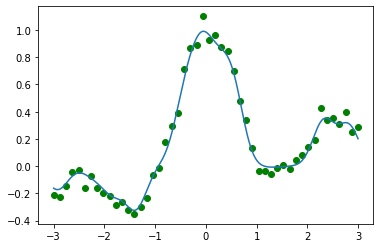

In [4]:
# create data to visualize the prediction
X = np.linspace(start=xmin, stop=xmax, num=5000)
K = calc_design_matrix(x, X, h)
prediction = K.dot(theta)

# visualization
plt.clf()
plt.scatter(x, y, c='green', marker='o')
plt.plot(X, prediction)
plt.show()

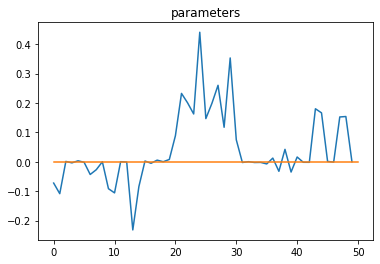

In [7]:
#  パラメータを並べてプロットしたグラフ
#  0になっているパラメータが多いことがわかる
#  下のセルを実行するとl2正則化に比べて0になっているパラメータが多い（＝スパースである）ことがわかる
plt.plot([i for i in range(len(theta))], theta)
plt.plot([0, 50], [0, 0])
plt.title('parameters')
plt.show()

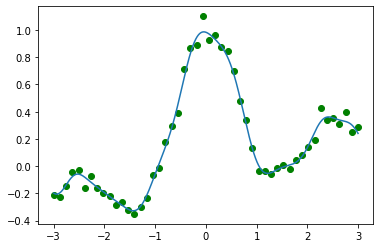

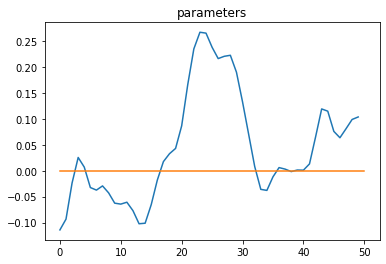

In [8]:
import numpy as np
import matplotlib

#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

np.random.seed(0)  # set the random seed for reproducibility


def generate_sample(xmin, xmax, sample_size):
    x = np.linspace(start=xmin, stop=xmax, num=sample_size)
    pix = np.pi * x
    target = np.sin(pix) / pix + 0.1 * x
    noise = 0.05 * np.random.normal(loc=0., scale=1., size=sample_size)
    return x, target + noise


def calc_design_matrix(x, c, h):
    return np.exp(-(x[None] - c[:, None]) ** 2 / (2 * h ** 2))


# create sample
sample_size = 50
xmin, xmax = -3, 3
x, y = generate_sample(xmin=xmin, xmax=xmax, sample_size=sample_size)

# calculate design matrix
h = 0.2
k = calc_design_matrix(x, x, h)

# solve the least square problem
l = 0.3
theta_l2 = np.linalg.solve(
    k.T.dot(k) + l * np.identity(len(k)),
    k.T.dot(y[:, None]))

# create data to visualize the prediction
X = np.linspace(start=xmin, stop=xmax, num=5000)
K = calc_design_matrix(x, X, h)
prediction = K.dot(theta_l2)

# visualization
plt.clf()
plt.scatter(x, y, c='green', marker='o')
plt.plot(X, prediction)
plt.show()

plt.plot([i for i in range(len(theta_l2))], theta_l2)
plt.plot([0, 50], [0, 0])
plt.title('parameters')
plt.show()